In [64]:
import os
from PIL import Image
import cv2
import numpy as np
import pandas as pd
import pickle
from tensorflow import keras
import re
from pathlib import Path

In [65]:
# creates the dataframe
avg_df = pd.DataFrame(columns=['Filename','R Average', 'G Average','B Average'])
avg_df

,Filename,R Average,G Average,B Average


In [66]:
# opencv reads grayscale images as 3 channels and copies the first layer twice
def is_grayscale(r, g, b):
    return b.all() == g.all() and b.all() == r.all()

In [67]:
def parse_visual_genome(avg_df):
    # read in all images and calculate the average RGB
    data_path = 'data/images/'

    for image in os.listdir(data_path):
            full_path = data_path + image
            img = cv2.imread(full_path)
            if img is not None:
                b,g,r = cv2.split(img)
                if not is_grayscale(r, g, b):
                    avg_dict = {'Filename':image, 'R Average':np.mean(r), 'G Average':np.mean(g), 'B Average':np.mean(b)}
                    avg_df = avg_df.append(avg_dict, ignore_index=True)

    return avg_df

In [68]:
def parse_cifar_100(avg_df, images, file_prefix, ext):
    # data_size = images.shape[0]
    img_idx = 0
    
    for image in images:
        # get file name
        filename = file_prefix+str(img_idx)+ext
        # save cifar img
        pil_img = Image.fromarray(np.uint8(image))
        pil_img.save('data/images/'+filename)
        
        # obtain channels
        r,g,b = pil_img.split()
        
        # calculate and save avgs
        avg_dict = {'Filename':filename, 'R Average':np.mean(r), 'G Average':np.mean(g), 'B Average':np.mean(b)}
        
        # append to df
        avg_df = avg_df.append(avg_dict, ignore_index=True)
        
        # move to next file
        img_idx += 1
        
    return avg_df

In [ ]:
def compile_img_database():
    regex = re.compile(r'^([^.]+)')
    img_df = pd.DataFrame(columns=['Filename','R Average', 'G Average','B Average'])
    for file in avg_df['Filename']:
        image = cv2.imread('data/images/'+file)
        b,g,r = cv2.split(image)
        img_dict = {'Filename':file, 'R Average':r.astype(np.uint8), 'G Average':g.astype(np.uint8), 'B Average':b.astype(np.uint8)}
        img_df = img_df.append(img_dict, ignore_index=True)
    
    img_df.to_csv('data/img_database.csv', index=False)

94233


In [69]:
def construct_avg_database():
    avg_df = parse_visual_genome(avg_df)
    (x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()
    avg_df = parse_cifar_100(avg_df, x_train, 'cifar_train_', '.jpeg')
    avg_df = parse_cifar_100(avg_df, x_test, 'cifar_test_', '.jpeg')
    
    avg_df.to_csv('data/avg_database.csv', index=False)

In [70]:
compile_avg_database()
compile_img_database()

In [124]:
print(len(img_df) == len())

True


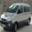

In [140]:
for row in img_df.values:
    name = row[0]
    r = row[1]
    g = row[2]
    b = row[3]
    image = np.dstack([r,g,b])
    Image.fromarray(image.astype(np.uint8)).show()
    break